# Nature relatedness scale survey for NR-6 (short form)

Research title: Which arts-based intervention is more effective for enhancing nature connectedness: nature writing or nature painting?

Student ID: 23451794514

## How data was collected:

This study employed a mixed experimental design to compare two arts-based interventions for enhancing nature connectedness. Data was collected through structured workshops conducted over two consecutive days in May 2025.

PARTICIPANTS:

Recruited from LIS University through convenience sampling
N = 9 total participants
N = 6 participants in Workshop 1 (writing)
N = 5 participants in Workshop 2 (painting)
Predominantly between-subjects design with 2 participants experiencing both workshops

SETTING:

Location: XandWhy courtyard (outdoor green space)
Duration: 60 minutes per workshop
Environment: Urban green space with trees, plants, and open sky

WORKSHOP STRUCTURE (both days):

- Pre-intervention NR-6 survey (5 mins)

- Creative activity with refreshments (30 mins)

- Workshop 1: Nature writing

- Workshop 2: Nature painting


- Post-intervention NR-6 survey (5 mins)

- Brief group discussion (10 mins)

MEASURES:

- Nature Relatedness Scale - 6 item short form (NR-6)
- Collected at 4 timepoints: pre/post for each workshop
- 5-point Likert scale (1=strongly disagree, 5=strongly agree)
- Group discussion audio recordings
- Written/visual artifacts from activities

Note: Optional individual interviews were planned but not conducted due to time constraints.

## Processing data plan

Processing data for this research includes the following: 

- Permutation tests
- Visual represnetations of data
- Descriptive stats
- Cohnens D effect size
  Power calculations


## Section 1: Permutation tests

In [39]:
# lets start by loading our survey 
import pandas as pd # Loading pandas 
survey_df = pd.read_csv('workshop_survey.csv', encoding='cp1252') # loading the survey csv file from microsoft forms 
survey_df

,Id,Start time,Completion time,Email,Name,Which Stage of the workshop are you completing this survey for? (please ask the researcher if you are unsure),What is your participant code?,"My ideal vacation spot would be a remote, wilderness area.",I always think about how my actions affect the environment.,My connection to nature and the environment is a part of my spirituality.,I take notice of wildlife wherever I am.,My relationship to nature is an important part of who I am.,I feel very connected to all living things and the earth.
0,1,5/29/2025 12:39,5/29/2025 12:40,anonymous,NaN,Pre-workshop 1,P4,5,3,4,4,3,1
1,2,5/29/2025 12:39,5/29/2025 12:40,anonymous,NaN,Pre-workshop 1,P1,3,5,5,5,5,4
2,3,5/29/2025 12:39,5/29/2025 12:40,anonymous,NaN,Pre-workshop 1,P6,5,5,5,4,5,4
3,4,5/29/2025 12:40,5/29/2025 12:41,anonymous,NaN,Pre-workshop 1,P5,5,4,5,4,4,4
4,5,5/29/2025 12:39,5/29/2025 12:41,anonymous,NaN,Pre-workshop 1,P2,4,3,2,3,2,3
5,6,5/29/2025 13:07,5/29/2025 13:07,anonymous,NaN,Post-workshop 1,P5,5,4,5,4,5,5
6,7,5/29/2025 13:07,5/29/2025 13:08,anonymous,NaN,Post-workshop 1,P3,4,5,5,5,5,4
7,8,5/29/2025 13:07,5/29/2025 13:08,anonymous,NaN,Post-workshop 1,P6,4,5,5,4,5,4
8,9,5/29/2025 13:08,5/29/2025 13:09,anonymous,NaN,Post-workshop 1,P1,4,5,5,5,5,4
9,10,5/29/2025 13:07,5/29/2025 13:09,anonymous,NaN,Post-workshop 1,P2,5,4,4,4,4,4


we need to change those column names to be codes or abbrevisations because those questions are far too long to work with when we want to manipulate the dataframe

In [40]:
#lets save the old names in a variable so that we can refer back to them later within the notebook during analysis
original_questions = survey_df.columns.tolist() # saving columns to original_questions
original_questions

['Id',
 'Start time',
 'Completion time',
 'Email',
 'Name',
 'Which Stage of the workshop are you completing this survey for? (please ask the researcher if you are unsure)',
 'What is your participant code?',
 'My ideal vacation spot would be a remote, wilderness area.',
 'I always think about how my actions affect the environment.',
 'My connection to nature and the environment is a part of my spirituality.',
 'I take notice of wildlife wherever I am.',
 'My relationship to nature is an important part of who I am.',
 'I feel very connected to all living things and the earth.']

In [41]:
# Create new column names abbreviations because thats all way too much
new_column_names = [
    'id',
    'start_time', 
    'completion_time',
    'email',
    'name',
    'workshop_stage',
    'participant_code',
    'vacation_wilderness',      # My ideal vacation spot would be a remote, wilderness area
    'think_about_actions',      # I always think about how my actions affect the environment
    'nature_spirituality',      # My connection to nature and the environment is a part of my spirituality
    'notice_wildlife',          # I take notice of wildlife wherever I am
    'nature_important_identity', # My relationship to nature is an important part of who I am
    'connected_living_things'    # I feel very connected to all living things and the earth
]

# Rename columns
survey_df.columns = new_column_names # replacing old column names with new ones

survey_df


,id,start_time,completion_time,email,name,workshop_stage,participant_code,vacation_wilderness,think_about_actions,nature_spirituality,notice_wildlife,nature_important_identity,connected_living_things
0,1,5/29/2025 12:39,5/29/2025 12:40,anonymous,NaN,Pre-workshop 1,P4,5,3,4,4,3,1
1,2,5/29/2025 12:39,5/29/2025 12:40,anonymous,NaN,Pre-workshop 1,P1,3,5,5,5,5,4
2,3,5/29/2025 12:39,5/29/2025 12:40,anonymous,NaN,Pre-workshop 1,P6,5,5,5,4,5,4
3,4,5/29/2025 12:40,5/29/2025 12:41,anonymous,NaN,Pre-workshop 1,P5,5,4,5,4,4,4
4,5,5/29/2025 12:39,5/29/2025 12:41,anonymous,NaN,Pre-workshop 1,P2,4,3,2,3,2,3
5,6,5/29/2025 13:07,5/29/2025 13:07,anonymous,NaN,Post-workshop 1,P5,5,4,5,4,5,5
6,7,5/29/2025 13:07,5/29/2025 13:08,anonymous,NaN,Post-workshop 1,P3,4,5,5,5,5,4
7,8,5/29/2025 13:07,5/29/2025 13:08,anonymous,NaN,Post-workshop 1,P6,4,5,5,4,5,4
8,9,5/29/2025 13:08,5/29/2025 13:09,anonymous,NaN,Post-workshop 1,P1,4,5,5,5,5,4
9,10,5/29/2025 13:07,5/29/2025 13:09,anonymous,NaN,Post-workshop 1,P2,5,4,4,4,4,4


### We don't need some of these columns so lets drop a few 

In [42]:
survey_df = survey_df.drop(['completion_time', 'start_time', 'id', 'email', 'name'], axis=1)
survey_df

,workshop_stage,participant_code,vacation_wilderness,think_about_actions,nature_spirituality,notice_wildlife,nature_important_identity,connected_living_things
0,Pre-workshop 1,P4,5,3,4,4,3,1
1,Pre-workshop 1,P1,3,5,5,5,5,4
2,Pre-workshop 1,P6,5,5,5,4,5,4
3,Pre-workshop 1,P5,5,4,5,4,4,4
4,Pre-workshop 1,P2,4,3,2,3,2,3
5,Post-workshop 1,P5,5,4,5,4,5,5
6,Post-workshop 1,P3,4,5,5,5,5,4
7,Post-workshop 1,P6,4,5,5,4,5,4
8,Post-workshop 1,P1,4,5,5,5,5,4
9,Post-workshop 1,P2,5,4,4,4,4,4


lets remove some of that pesky whitespace we suspect might be there (since its an ms forms file)

In [43]:
string_cols = survey_df.select_dtypes(include=['object']).columns # selects only columns that contain objects and gets the column name not the data
for col in string_cols: # takes those objects and says for each object...
    survey_df[col] = survey_df[col].str.strip() # remove leading/trailing whitespace from that column. replaces original text with the clean version. 

In [44]:
print(survey_df['workshop_stage'].unique()) # lets check a column to see if theres any whitespace left

['Pre-workshop 1' 'Post-workshop 1' 'Pre-workshop 2' 'Post-workshop 2']


In [45]:
nr6_columns = [ 
    'vacation_wilderness', 
    'think_about_actions',
    'nature_spirituality',
    'notice_wildlife',
    'nature_important_identity',
    'connected_living_things'
]
# we're adding column names to the end of the dataframe which will calculate the averages across rows by adding the total score for each person
# and will then divide the tota; by 6 (n=). 
survey_df['nr6_total'] = survey_df[nr6_columns].sum(axis=1) # total column
survey_df['nr6_average'] = survey_df[nr6_columns].mean(axis=1) # mean column

In [46]:
survey_df

,workshop_stage,participant_code,vacation_wilderness,think_about_actions,nature_spirituality,notice_wildlife,nature_important_identity,connected_living_things,nr6_total,nr6_average
0,Pre-workshop 1,P4,5,3,4,4,3,1,20,3.333333
1,Pre-workshop 1,P1,3,5,5,5,5,4,27,4.500000
2,Pre-workshop 1,P6,5,5,5,4,5,4,28,4.666667
3,Pre-workshop 1,P5,5,4,5,4,4,4,26,4.333333
4,Pre-workshop 1,P2,4,3,2,3,2,3,17,2.833333
5,Post-workshop 1,P5,5,4,5,4,5,5,28,4.666667
6,Post-workshop 1,P3,4,5,5,5,5,4,28,4.666667
7,Post-workshop 1,P6,4,5,5,4,5,4,27,4.500000
8,Post-workshop 1,P1,4,5,5,5,5,4,28,4.666667
9,Post-workshop 1,P2,5,4,4,4,4,4,25,4.166667


In [47]:
# Organising into workshops 1 and 2
# here we are going to make a df for just workshop 1 - the writing workshop
workshop_1_mix = survey_df[(survey_df['workshop_stage'] == 'Pre-workshop 1') | (survey_df['workshop_stage'] == 'Post-workshop 1')]
workshop_1_mix

,workshop_stage,participant_code,vacation_wilderness,think_about_actions,nature_spirituality,notice_wildlife,nature_important_identity,connected_living_things,nr6_total,nr6_average
0,Pre-workshop 1,P4,5,3,4,4,3,1,20,3.333333
1,Pre-workshop 1,P1,3,5,5,5,5,4,27,4.500000
2,Pre-workshop 1,P6,5,5,5,4,5,4,28,4.666667
3,Pre-workshop 1,P5,5,4,5,4,4,4,26,4.333333
4,Pre-workshop 1,P2,4,3,2,3,2,3,17,2.833333
5,Post-workshop 1,P5,5,4,5,4,5,5,28,4.666667
6,Post-workshop 1,P3,4,5,5,5,5,4,28,4.666667
7,Post-workshop 1,P6,4,5,5,4,5,4,27,4.500000
8,Post-workshop 1,P1,4,5,5,5,5,4,28,4.666667
9,Post-workshop 1,P2,5,4,4,4,4,4,25,4.166667


In [48]:
# now we get all data from workshop 2 into one df (same process as workshop 1)
workshop_2_mix = survey_df[(survey_df['workshop_stage'] == 'Pre-workshop 2') | (survey_df['workshop_stage'] == 'Post-workshop 2')]
workshop_2_mix

,workshop_stage,participant_code,vacation_wilderness,think_about_actions,nature_spirituality,notice_wildlife,nature_important_identity,connected_living_things,nr6_total,nr6_average
12,Pre-workshop 2,P7,4,3,4,5,4,4,24,4.000000
13,Pre-workshop 2,P3,4,5,5,5,5,4,28,4.666667
14,Pre-workshop 2,P2,4,3,3,4,3,4,21,3.500000
15,Pre-workshop 2,P9,2,2,1,2,1,2,10,1.666667
16,Pre-workshop 2,P8,2,4,3,4,4,3,20,3.333333
17,Post-workshop 2,P9,4,2,2,4,3,3,18,3.000000
18,Post-workshop 2,P7,4,4,4,5,4,4,25,4.166667
19,Post-workshop 2,P3,4,5,5,5,5,4,28,4.666667
20,Post-workshop 2,P2,5,4,3,4,5,4,25,4.166667
21,Post-workshop 2,P8,3,4,4,4,4,4,23,3.833333


In [49]:
# Creating the pre-workshop 1 averages
pre_w1 = workshop_1_mix[workshop_1_mix['workshop_stage'] == 'Pre-workshop 1'][['participant_code', 'nr6_average']] #creates a boolean mask where workshop stage = pre workshop 1. results in a df with just pre-workshop 1 ppts and their codes + NR6 values
pre_w1 = pre_w1.rename(columns={'nr6_average': 'pre_workshop1_avg'}) # renames NR6 column to pre-workshop 1 avg to make distinct to workshop 2 df
print(pre_w1)

# Create the pre-workshop 2 averages. same thing here with the 2nd workshop
pre_w2 = workshop_2_mix[workshop_2_mix['workshop_stage'] == 'Pre-workshop 2'][['participant_code', 'nr6_average']]
pre_w2 = pre_w2.rename(columns={'nr6_average': 'pre_workshop2_avg'})
print(pre_w2)

   participant_code  pre_workshop1_avg
0                P4           3.333333
1                P1           4.500000
2                P6           4.666667
3                P5           4.333333
4                P2           2.833333
11               P3           4.500000
   participant_code  pre_workshop2_avg
12               P7           4.000000
13               P3           4.666667
14               P2           3.500000
15               P9           1.666667
16               P8           3.333333


In [50]:
# same thing here but for POST workshop not pre
# the post-workshop 1 averages  
post_w1 = workshop_1_mix[workshop_1_mix['workshop_stage'] == 'Post-workshop 1'][['participant_code', 'nr6_average']]
post_w1 = post_w1.rename(columns={'nr6_average': 'post_workshop1_avg'})
print(post_w1)

# the post workshop 2 averages 
post_w2 = workshop_2_mix[workshop_2_mix['workshop_stage'] == 'Post-workshop 2'][['participant_code', 'nr6_average']]
post_w2 = post_w2.rename(columns={'nr6_average': 'post_workshop2_avg'})
print(post_w2)

   participant_code  post_workshop1_avg
5                P5            4.666667
6                P3            4.666667
7                P6            4.500000
8                P1            4.666667
9                P2            4.166667
10               P4            3.333333
   participant_code  post_workshop2_avg
17               P9            3.000000
18               P7            4.166667
19               P3            4.666667
20               P2            4.166667
21               P8            3.833333


In [51]:
# Merge them together
workshop_1_comparison = pre_w1.merge(post_w1, on='participant_code', how='outer')
print(workshop_1_comparison)

workshop_2_comparison = pre_w2.merge(post_w2, on='participant_code', how='outer')
print(workshop_2_comparison)

  participant_code  pre_workshop1_avg  post_workshop1_avg
0               P1           4.500000            4.666667
1               P2           2.833333            4.166667
2               P3           4.500000            4.666667
3               P4           3.333333            3.333333
4               P5           4.333333            4.666667
5               P6           4.666667            4.500000
  participant_code  pre_workshop2_avg  post_workshop2_avg
0               P2           3.500000            4.166667
1               P3           4.666667            4.666667
2               P7           4.000000            4.166667
3               P8           3.333333            3.833333
4               P9           1.666667            3.000000


In [52]:
# Add a column that calculates the difference (post - pre) for workshop 2
workshop_2_comparison['difference'] = workshop_2_comparison['post_workshop2_avg'] - workshop_2_comparison['pre_workshop2_avg']

print(workshop_2_comparison)

  participant_code  pre_workshop2_avg  post_workshop2_avg  difference
0               P2           3.500000            4.166667    0.666667
1               P3           4.666667            4.666667    0.000000
2               P7           4.000000            4.166667    0.166667
3               P8           3.333333            3.833333    0.500000
4               P9           1.666667            3.000000    1.333333


In [53]:
# Add a column that calculates the difference (post - pre) for workshop 1 
workshop_1_comparison['difference'] = workshop_1_comparison['post_workshop1_avg'] - workshop_1_comparison['pre_workshop1_avg']

print(workshop_1_comparison)

  participant_code  pre_workshop1_avg  post_workshop1_avg  difference
0               P1           4.500000            4.666667    0.166667
1               P2           2.833333            4.166667    1.333333
2               P3           4.500000            4.666667    0.166667
3               P4           3.333333            3.333333    0.000000
4               P5           4.333333            4.666667    0.333333
5               P6           4.666667            4.500000   -0.166667


## What does this tell us? 

We can already see here that there are far more + then - between NR6 scores before vs after the workshops. There is one - which shows us that Participant 6 actually felt like their nature connectedness decreased post workshop. This is fascinating to note and observe qualitatively to see if these scores correlate with what they shared verbally during the workshop. despite this one anoomoly, we can now take our data and look at our hypothesis guided by the predictions made in our introduction and literature review: 

## Hypothesis:
In permutation tests we structure our test to answer a null and an alternative hypothesis.
source: https://www.jwilber.me/permutationtest/)

### Alternative:  Workshop 2 (painting) produces a greater average increase in nature connectedness scores than Workshop 1 (writing)

### Null: There is no difference in average nature connectedness increases between Workshop 2 (painting) and Workshop 1 (writing)

In [62]:
# working out the mean sum of the difference column for both workshops average change for each workshop
workshop1_avg = workshop_1_comparison['difference'].mean()
workshop2_avg = workshop_2_comparison['difference'].mean()

# calculating the difference between average increase between workshops
between_workshop_difference = workshop2_avg - workshop1_avg

In [63]:
workshop1_avg

np.float64(0.30555555555555575)

In [66]:
between_workshop_difference

np.float64(0.2277777777777777)

This demonstrates that there was in fact a higher average increase in nature connectedness scores in workshop 2 vs workshop 1. If this data alone was sufficient, then we could be able to accept our hypothesis. However without a statistical test we cannot accept our hypothesis. Thus we need to conduct a statistical test to measure this. 

A permutation test is particularly well-suited for this research scenario for several reasons. First, our sample sizes are very small (n=6 and n=5), which violates the assumptions required for traditional tests like t-tests that rely on normal distributions. Permutation tests make no assumptions about the underlying distribution of the data, making them robust for small samples.

Selylynd, permutation tests directly test our specific research question: "Could this observed difference have occurred by chance alone?" By randomly shuffling participants between workshop conditions thousands of times, we create a null distribution that shows what differences we would expect if workshop type truly had no effect. This allows us to determine how unusual our observed difference of 0.227 points actually is.

Third, the permutation test logic aligns perfectly ntal design. If there really is no difference between painting and writing workshops (our null hypothesis), then it shouldn't matter which workshop a participant attended - we could randomly reassign them and get similar results. The permutation test simulates exactly this scenario, providing a direct test of whether our observed difference is statistically meaningful or could reasonably be attributed to random vaion. 







## Setting up the Permutation test

In [67]:
# lets convert our differences data into an array so that we can shuffle the data 
workshop_1_differences = workshop_1_comparison['difference'].values
workshop_2_differences = workshop_2_comparison['difference'].values

In [68]:
workshop_1_differences 

array([ 0.16666667,  1.33333333,  0.16666667,  0.        ,  0.33333333,
       -0.16666667])

In [69]:
workshop_2_differences

array([0.66666667, 0.        , 0.16666667, 0.5       , 1.33333333])

In [70]:
# now we're concatenating the data so that it's all one array before we shuffle it
import numpy as np
pooled = np.concatenate([workshop_1_differences, workshop_2_differences])
pooled

array([ 0.16666667,  1.33333333,  0.16666667,  0.        ,  0.33333333,
       -0.16666667,  0.66666667,  0.        ,  0.16666667,  0.5       ,
        1.33333333])

In [71]:
# calculating the workshop size of each so that the numbers are split and shuffled in the same original proportions
n1 = len(workshop_1_differences)  # Workshop 1 size
n2 = len(workshop_2_differences)  # Workshop 2 size

In [72]:
n1

6

In [73]:
n2

5

In [74]:
# Randomly shuffling the pooled data using . random and .permutation
shuffled = np.random.permutation(pooled)
shuffled

array([ 0.66666667,  0.16666667, -0.16666667,  1.33333333,  1.33333333,
        0.        ,  0.16666667,  0.33333333,  0.5       ,  0.16666667,
        0.        ])

In [75]:
# one example split (test)
# This simulates "what if workshop type didn't matter?" If painting vs writing made no real difference, then randomly reassigning people should give us similar results to what we actually observed.
# Split back into two groups of original sizes
test_workshop1 = shuffled[:n1]  # First n1 values
test_workshop2 = shuffled[n1:]  # Remaining values

In [76]:
print (test_workshop1)

[ 0.66666667  0.16666667 -0.16666667  1.33333333  1.33333333  0.        ]


In [77]:
print(test_workshop2)

[0.16666667 0.33333333 0.5        0.16666667 0.        ]


In [95]:
# Calculate difference for this random assignment
test_diff = np.mean(test_workshop2) - np.mean(test_workshop1)
test_diff

np.float64(-0.32222222222222213)

In [96]:
# okay now we're ready to do many permutations!!

In [97]:
# Set up for many permutations
n_permutations = 10000
permuted_differences = []

# Doing the shuffle thousands of times
for i in range(n_permutations):
    # Shuffle the pooled data
    shuffled = np.random.permutation(pooled)
    
    fake_workshop1 = shuffled[:n1] # splitting into fake groups taking the first 6 (n=) numbers in the shuffled array
    fake_workshop2 = shuffled[n1:] # taking the next 5

    # Test Statistic
    fake_diff = np.mean(fake_workshop2) - np.mean(fake_workshop1) # calculating the new mean of each shuffled group
    permuted_differences.append(fake_diff) # appending all these mean differencesto our empty list to build a null distribution

# Convert to array
permuted_differences = np.array(permuted_differences) # converting to an array
permuted_differences[:10] # the first 10 fake_diff erences 

array([ 0.28888889,  0.41111111, -0.44444444, -0.38333333,  0.16666667,
        0.04444444, -0.68888889, -0.2       , -0.2       ,  0.04444444])

In [98]:
# How many times did we get a difference as big as (or bigger than) what we observed?
extreme_count = np.sum(permuted_differences >= between_workshop_difference)

# "What proportion of random shuffles were as extreme as our real result?"
p_value = extreme_count / n_permutations

In [99]:
print(f"Our observed difference: {between_workshop_difference}")
print(f"Times we got >= this difference by chance: {extreme_count}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("Significant! Workshop 2 is significantly better than Workshop 1")
else:
    print("Not significant. No evidence Workshop 2 is better")

Our observed difference: 0.2277777777777777
Times we got >= this difference by chance: 2494
P-value: 0.2494
Not significant. No evidence Workshop 2 is better


## what does this tell us?

- Out of 10,000 random shuffles, about 2,300 of them produced differences ≥ 0.227
- So there's a 23% chance you could see this difference (or bigger) purely by random chance
- Since 23% > 5%, it's not statistically significant 

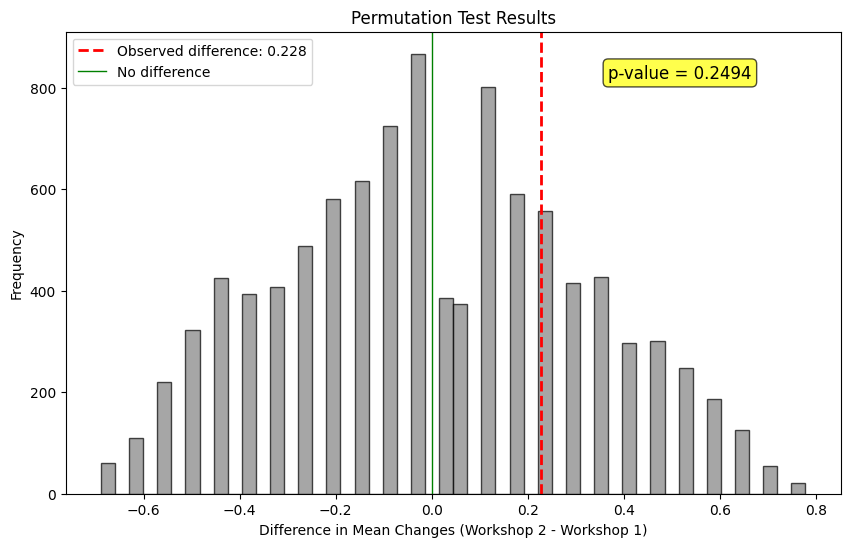

In [100]:
import matplotlib.pyplot as plt

# Plotting the distribution!
plt.figure(figsize=(10, 6))
plt.hist(permuted_differences, bins=50, alpha=0.7, color='grey', edgecolor='black')
plt.axvline(between_workshop_difference, color='red', linestyle='--', linewidth=2, 
           label=f'Observed difference: {between_workshop_difference:.3f}')
plt.axvline(0, color='green', linestyle='-', linewidth=1, label='No difference')

plt.xlabel('Difference in Mean Changes (Workshop 2 - Workshop 1)')
plt.ylabel('Frequency')
plt.title('Permutation Test Results')
plt.legend()
plt.text(0.7, 0.9, f'p-value = {p_value:.4f}', transform=plt.gca().transAxes, 
         fontsize=12, bbox=dict(boxstyle="round", facecolor="yellow", alpha=0.7))
plt.show()

## What does this show us? 
- X-axis shows the Difference in average change between Workshop 2 and Workshop 1 where negative values mean Workshop 1 performed better and positive values mean Workshop 2 performed better. Y-axis shows the Frequency (how often each difference occurred across thousands of random shuffles of the data).
- Tall grey bars: These tell us how often each possible difference (from the x-axis) showed up during the permutation test.
- Green line at 0: This is the "no difference" point.
- Red dashed line at ~0.228: This is the actual observed difference between the two workshops.
- Yellow box (p-value = 0.2393): This tells us how likely it is to see a difference as big or bigger than 0.228 just by chance.

## Bessels correction

"Using Bessel’s correction in this way slightly increases our estimate of the variance, making it closer to what the population variance would be if we calculated it from the whole population instead of just a sample.
n
Dividing by n−1 when calculating sample variance may seem like a small change, but it’s essential to achieve an unbiased estimate of the population variance. This adjustment, known as Bessel’s correction, accounts for the underestimation that occurs due to relying on the sample mean instead of the true population memary:

Using n−1 compensates for the fact that we’re basing variance on a sample mean, which tends to underestimate true variability"

source: https://towardsdatascience.com/bessels-correction-why-do-we-divide-by-n-1-instead-of-n-in-sample-variance-30b074503bd9/#:~:text=This%20adjustment%2C%20known%20as%20Bessel's,tends%20to%20underestimate%20true%20variability.


In [101]:
# Variance of each group (with Bessel's correction)
#ddof means delta degrees of freedom
#ddof=1 divides by (n-1) instead of n when calculating variance
# Without correction (ddof=0) divides by n (sample size), gives population variance and tends to underestimate the true variance
# With correction (ddof=1) divides by (n-1),gives sample variance and thus is a better estimate when working with small samples

var1 = np.var(workshop_1_differences, ddof=1)
var2 = np.var(workshop_2_differences, ddof=1)

In [102]:
var1

np.float64(0.2824074074074075)

In [103]:
var2

np.float64(0.2694444444444444)

## Pooled standard deviation

In [104]:
# Pooled standard deviation
# Combining the variability from both workshop groups into one "average" standard deviation that represents the overall spread in your data.
pooled_std = np.sqrt(((n1-1)*var1 + (n2-1)*var2) / (n1+n2-2))
# Step 1: (n1-1)*var1 = Workshop 1 variance × Workshop 1 degrees of freedom
# Step 2: (n2-1)*var2 = Workshop 2 variance × Workshop 2 degrees of freedom  
# Step 3: Add them together and divide by total degrees of freedom (n1+n2-2)
# Step 4: Take square root to convert from pooled variance back to pooled standard deviation
# This gives us a single measure of variability that accounts for both groups' spread

In [105]:
pooled_std

np.float64(0.5259715681811893)

## Cohens D

In [106]:
# Cohen's d
cohens_d = between_workshop_difference / pooled_std

In [107]:
cohens_d

np.float64(0.43306100853594365)

In [108]:
# Interpretation based on source: https://resources.nu.edu/statsresources/cohensd
if abs(cohens_d) < 0.2:
    effect_size = "too small"
elif abs(cohens_d) < 0.5:
    effect_size = "small"
elif abs(cohens_d) < 0.8:
    effect_size = "medium"
else:
    effect_size = "large"

print(f"Effect size: {effect_size}")

Effect size: small


## Power

A common practice in science is to use a software called G power to calculate sample size before conducting a study to calculate how many participants are needed in a study to ensure that your test is gathering enough data to do statistical tests - to get meaningful insights. For a short project, it would be very difficult to get a large enough sample of participants involved but for good practice we will calculate the number of participants needed retrospectively - which we will highlight in our paper to inform future researchers of exactly how to carry out the research. Its like doing the ground work for them so that they can just do the study. 

This function takes 3 inputs: 
- alpha: significance level (probability of false positive, usually 0.05)
- effect size = Cohen's d
- n = sample size per group (number of participants in each condition)

It then calculates the degrees of freedom (total ppts minus 2) - which accounts for uncertainity from estimating two separate group means. It then finds the critical t value which is the threshold our stat test needs to exceed to be significant. it then does alpha (0.5) divided by 2  because its testing for differences in either direction. It then calculates a non-centrality parameter. 


In [109]:
#"If there really is a difference between writing and painting interventions, what are the chances my study will detect it?"
from statsmodels.stats.power import ttest_power

# Calculate power for different scenarios
power = ttest_power(effect_size=cohens_d, nobs=11, alpha=0.05) # ttest assumes we have 5.5 participants per group which 
# obviosuly isnt true but since our sample is so small, this wont affect much anyway. In an ideal world, our study would have been 
# conducted with the same number of people per study anyway. We will specify in the write up that this is ~25%
print(f"Power: {power:.3f}")

Power: 0.255


## What does this result tell us? 

This result is telling us that the way our study has been conducted means that it only has a 25% chance of detecting a true difference between writing and painting interventions (if one actually exists). This is important for us to be transparent about in the write up. 

In [110]:
# code has been structured from here: https://www.statsmodels.org/dev/generated/statsmodels.stats.power.tt_solve_power.html
# "Based on the effect size I actually observed in my data, how many participants would I need in a future study to have 80% power to detect this same effect?"
from statsmodels.stats.power import tt_solve_power

min_sample_size = tt_solve_power(
   effect_size= cohens_d,      #  Cohen's d (small) as calculated
   power=0.8,            # 80% power (standard threshold)
   alpha=0.05,           # 5% significance level
   alternative='two-sided'  # Two-tailed test (difference could go either way)
)

print(f"Minimum sample size needed per group for 80% power for small effect size: {min_sample_size:.0f}")
print(f"Total participants needed: {min_sample_size * 2:.0f}")

Minimum sample size needed per group for 80% power for small effect size: 44
Total participants needed: 88


In [111]:
cohens_d

np.float64(0.43306100853594365)

Based on the observed effect size (Cohen's d = 0.43), a future study would require approximately 44 participants per group (88 total) to achieve 80% power for detecting small intervention effects. 

## Section 2: Average change per dimension of the NR-6

In [112]:
# Create summary table for all dimensions
question_cols = ['vacation_wilderness', 'think_about_actions', 'nature_spirituality', 
                 'notice_wildlife', 'nature_important_identity', 'connected_living_things']

# Calculate changes for both workshops
changes_data = []

for question in question_cols:
    # Workshop 1 changes
    w1_pre = workshop_1_mix[workshop_1_mix['workshop_stage'] == 'Pre-workshop 1'][question].mean() # getting average score for current question before workshop 1
    w1_post = workshop_1_mix[workshop_1_mix['workshop_stage'] == 'Post-workshop 1'][question].mean()
    w1_change = w1_post - w1_pre
    
    # Workshop 2 changes  
    w2_pre = workshop_2_mix[workshop_2_mix['workshop_stage'] == 'Pre-workshop 2'][question].mean()
    w2_post = workshop_2_mix[workshop_2_mix['workshop_stage'] == 'Post-workshop 2'][question].mean()
    w2_change = w2_post - w2_pre
    
    changes_data.append({ # prepping our dataframe 
        'Dimension': question,
        'Workshop_1_Change': w1_change,
        'Workshop_2_Change': w2_change
    })
# Creating DataFrame
changes_df = pd.DataFrame(changes_data)
changes_df = changes_df.round(3)
print(changes_df)

                   Dimension  Workshop_1_Change  Workshop_2_Change
0        vacation_wilderness              0.167                0.8
1        think_about_actions              0.500                0.4
2        nature_spirituality              0.000                0.4
3            notice_wildlife              0.333                0.4
4  nature_important_identity              0.500                0.8
5    connected_living_things              0.333                0.4


## What does this tell us?

Item-level analysis revealed distinct patterns of change across the six nature connectedness dimensions. The painting intervention demonstrated consistently moderate increases across all NR-6 items (range: 0.400-0.800, M = 0.533), while the writing intervention showed more variable effects (range: 0.000-0.500, M = 0.306). The painting intervention showed particularly strong effects on identity-related dimensions, with the largest increases in 'vacation wilderness preferences' (+0.800) and 'nature as important part of identity' (+0.800). All six dimensions showed positive changes, suggesting a broad, holistic impact on nature connectedness. The writing intervention demonstrated more targeted effects, with the strongest increases in reflective dimensions, including 'thinking about environmental actions' (+0.500) and 'nature as important part of identity' (+0.500). The 'nature spirituality' dimension showed no change (+0.000), while other dimensions showed modest improvements. These patterns suggest different mechanisms of action: painting may foster nature connectedness through visual-spatial engagement that broadly enhances identification with natural environments, while writing may work through cognitive-reflective processes that strengthen behavioural intentions and identity integration, but may be less effective for spiritual dimensions of nature connection. However, given the small sample size (n=6), these item-level patterns should be interpreted as preliminary findings requiring replication in larger studies.